In [2]:
# import important dependencies for the project
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error
import numpy as np
from sklearn import linear_model
import pickle
import math
%matplotlib inline

In [3]:
# open the file to load the data using pickle
f = open('./Q1_data/data.pkl', 'rb')
in_data = pickle.load(f)
f.close()
np.random.shuffle(in_data)

In [4]:
in_data.shape

(5000, 2)

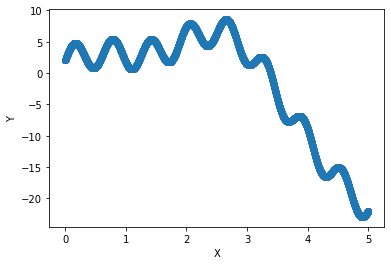

In [5]:
# since we have x and y in the same array we need to segregate the two
X = in_data[:,0]
Y = in_data[:,1]
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
# separate the training and testing data by using the slicing of arrays
test_X = np.array([X[i] for i in range(math.ceil(len(X)/10))])
train_X = np.array([X[i] for i in range(math.ceil(len(X)/10),len(X))])
test_Y = np.array([Y[i] for i in range(math.ceil(len(Y)/10))])
train_Y = np.array([Y[i] for i in range(math.ceil(len(Y)/10),len(Y))])

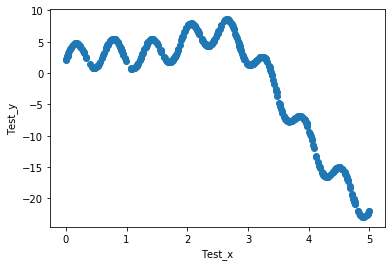

In [7]:
# plot for the testing data
plt.scatter(test_X,test_Y)
plt.xlabel('Test_x')
plt.ylabel('Test_y')
plt.show()

# Here we see that the test data is almost same as the total data

In [8]:
# Now we need to train the model for different degrees on 10 different datasets
# so first partition the training data into 10 parts
partitions = 10
partitionedX = np.array_split(train_X,partitions)
partitionedY = np.array_split(train_Y,partitions)

[29.81926639  5.49068898  4.64751601  3.18688093  2.99015253  2.74849639
  2.69121209  2.67030426  2.65973333]


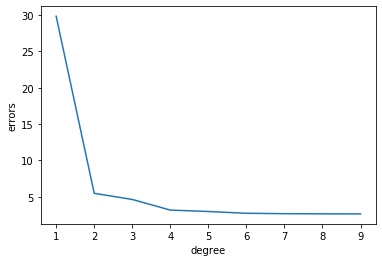

[29.72873568  5.45803159  4.59887535  3.16120451  2.94596101  2.70891755
  2.63582055  2.60075815  2.59035751]


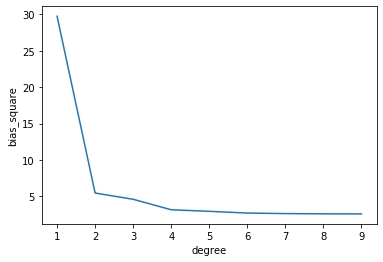

[0.09053071 0.03265739 0.04864067 0.02567641 0.04419152 0.03957885
 0.05539154 0.06954611 0.06937582]


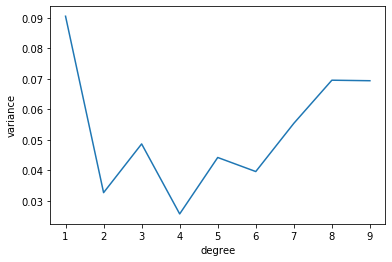

[ 0.0000000e+00  8.8817842e-16  0.0000000e+00  4.4408921e-16
  8.8817842e-16  0.0000000e+00  0.0000000e+00 -4.4408921e-16
  0.0000000e+00]


In [10]:
# for degree of polynomial 1 to 9 generate the models
errors = list()
bias_square = list()
variance = list()
for currDeg in range(1,10):
    predict = list()
    diffs = list()
    error = list()
    poly = PolynomialFeatures(degree = currDeg)
    curr_test_X = poly.fit_transform(test_X.reshape(-1,1))
    # loop over all the 10 partitions to create 10 different models
    for chunk in range(partitions):
        
        curr_train_X = poly.fit_transform(partitionedX[chunk].reshape(-1,1))
        # get the regressor now
        regressor = linear_model.LinearRegression()
        regressor.fit(curr_train_X,partitionedY[chunk])
        
        # now test it
        prediction = regressor.predict(curr_test_X)
        
        # fill the lists
        diffs.append(prediction - test_Y)
        predict.append(prediction)
        error.append(mean_squared_error(test_Y,prediction))
        
        # calculate bias = E(f' - f) and variance = E[(f' - E[f'])^2] for each point accross models
    errors.append(np.mean(error))
    diffs = np.array(diffs)
    diffs = np.transpose(diffs)
    predict = np.array(predict)
    curr_bias = np.mean(np.mean(diffs,1)**2)

    bias_square.append(curr_bias)
    variance.append(np.mean((predict - np.mean(predict,0))**2))

errors = np.array(errors)
bias_square = np.array(bias_square)
variance = np.array(variance)
plt.plot(range(1,10),errors)
plt.xlabel('degree')
plt.ylabel('errors')
print(errors)
plt.show()
plt.plot(range(1,10),bias_square)
plt.xlabel('degree')
plt.ylabel('bias_square')
print(bias_square)
plt.show()
plt.plot(range(1,10),variance)
print(variance)
plt.xlabel('degree')
plt.ylabel('variance')
plt.show()

print(errors - (bias_square+variance))